*Akanksha c. Khandare*

ASSIGNMENT 5 EDA1
Cardiotocographic Dataset - Exploratory Data Analysis

Objective: Perform full EDA to uncover insights, identify patterns, 
and understand dataset structure.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for clean visual

In [4]:
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

In [6]:
df = pd.read_csv("Cardiotocographic.csv")


In [7]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [8]:
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


#DATA CLEANING AND PREPRATION#

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [23]:
df.shape

(2126, 14)

#to convert numric like string to numbers(if sny)

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col], errors="ignore")

#to handel missing values

In [22]:
#for numeric col , fill nan with median
for col in df.select_dtypes(include=np.number).columns:
     df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include="object").columns:
         df[col] = df[col].fillna(df[col].mode()[0])
#for categorocal col fill nan with mode

#detect and treat outliers

In [34]:
def treat_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower , lower, np.where(data[col] > upper , upper, data[col]))

    


In [35]:
for col in df.select_dtypes(include=np.number).columns:
    treat_outliers_iqr(df, col)

In [36]:
print("data cleaning done!!")

data cleaning done!!


#statistical Summary

In [37]:
summary = df.describe().T
print(summary)

           count        mean        std         min         25%         50%  \
LB        2126.0  133.290331   9.930268  105.000000  126.000000  133.000000   
AC        2126.0    0.003132   0.003828   -0.008409    0.000000    0.001634   
FM        2126.0    0.001568   0.002485   -0.003850    0.000000    0.000000   
UC        2126.0    0.004362   0.003001   -0.005177    0.001851    0.004484   
DL        2126.0    0.001770   0.002668   -0.004934    0.000000    0.000000   
DS        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      2126.0   46.981873  17.612745  -11.500000   32.000000   49.000000   
MSTV      2126.0    1.304644   0.781091   -0.800000    0.700000    1.200000   
ALTV      2126.0    6.691678  10.378400  -16.500000    0.000000    0.000000   
MLTV      2126.0    8.007471   5.047078   -4.700000    4.600000    7.400000   
Width     2126.0   70.287203  39.571995  -57.500000 

#Data Visualization

***1.Histogram*** 

Text(0.5, 0.98, 'Histogram of numerical features')

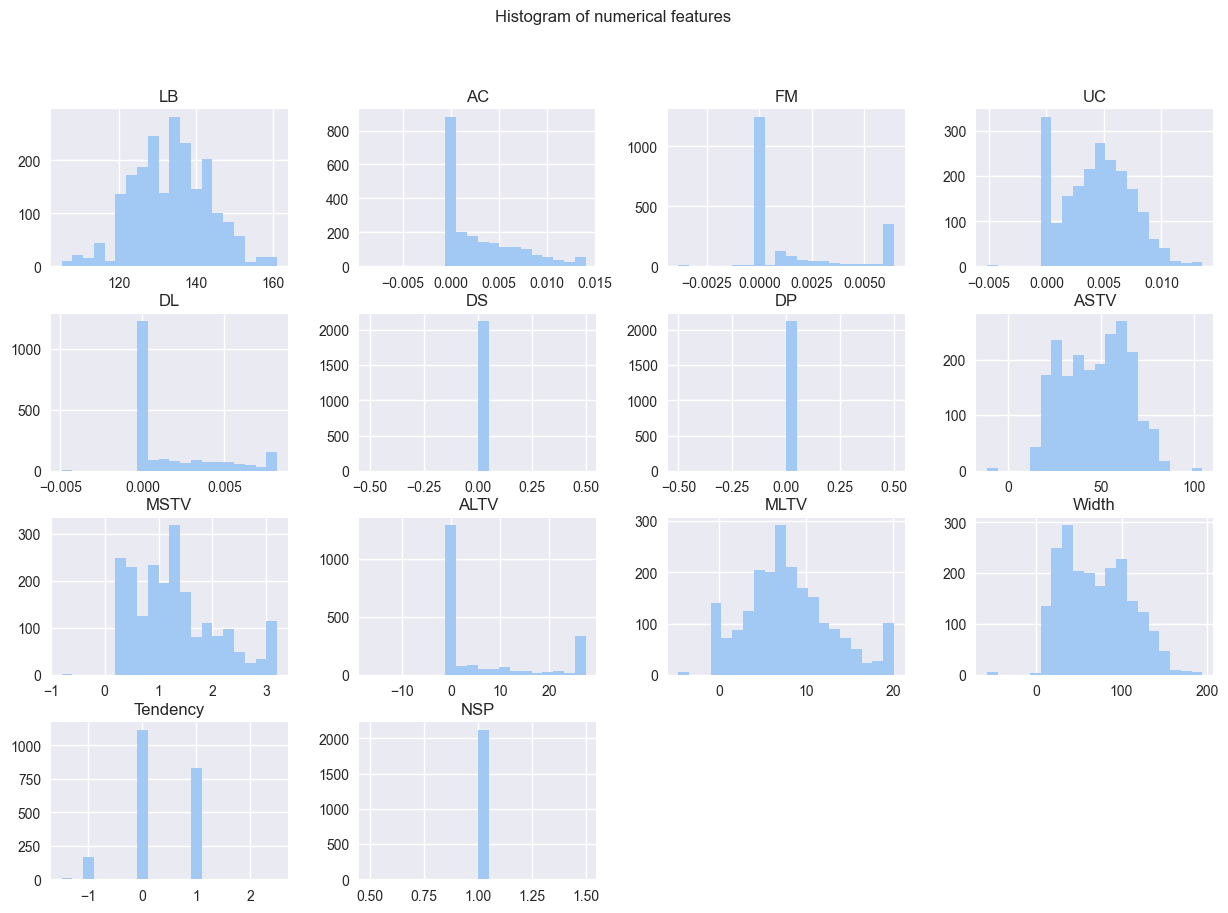

In [41]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Histogram of numerical features")


***Boxplot***

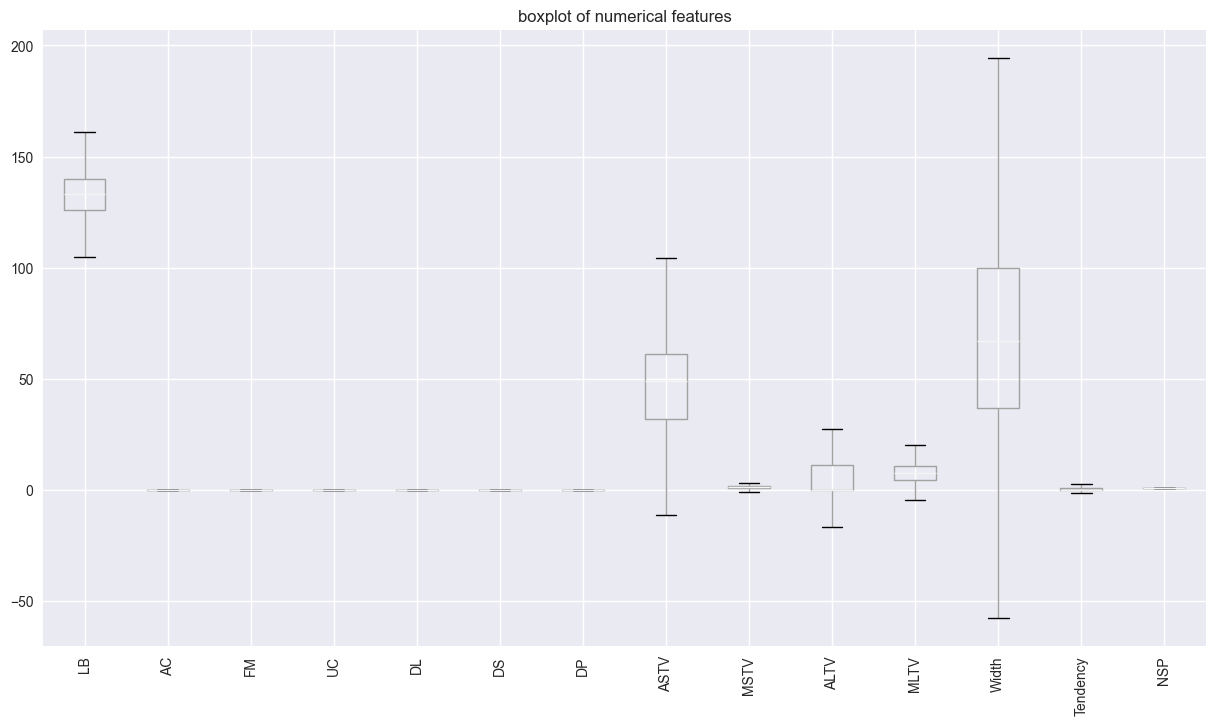

In [45]:
plt.figure(figsize=(15,8))
df.boxplot(rot=90)
plt.title("boxplot of numerical features")
plt.show()

***COrelation heatmap***

Text(0.5, 1.0, 'CORELLATION HEATMAP')

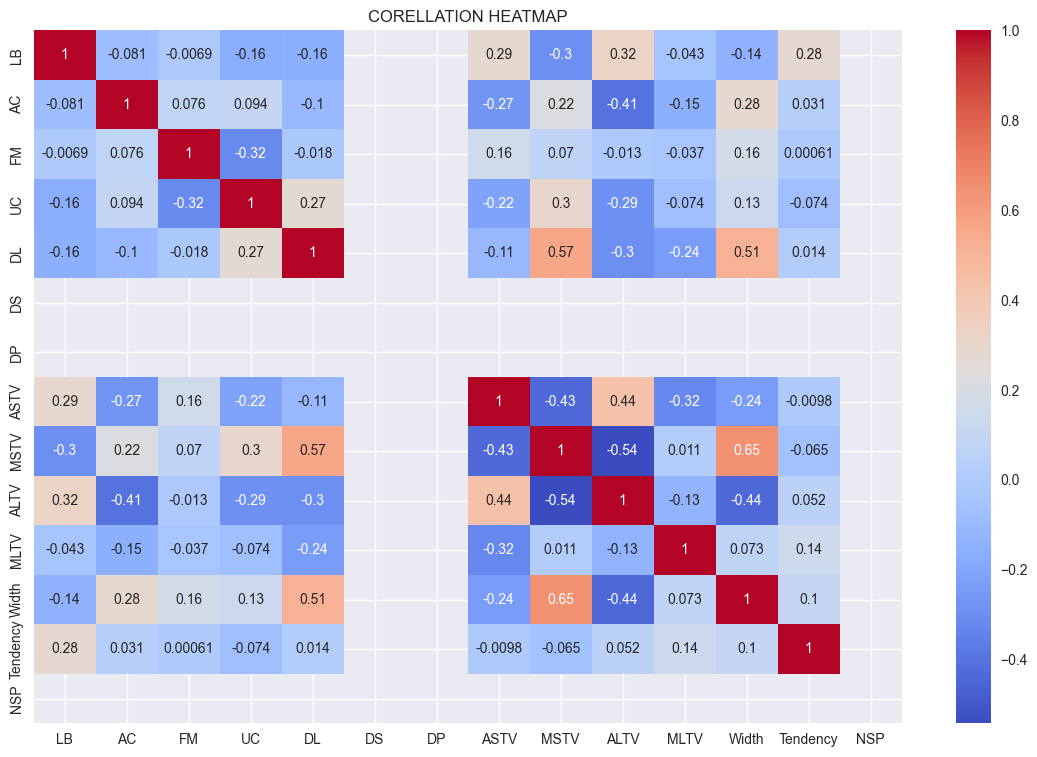

In [46]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("CORELLATION HEATMAP")

***Pairplot(for first few col)***

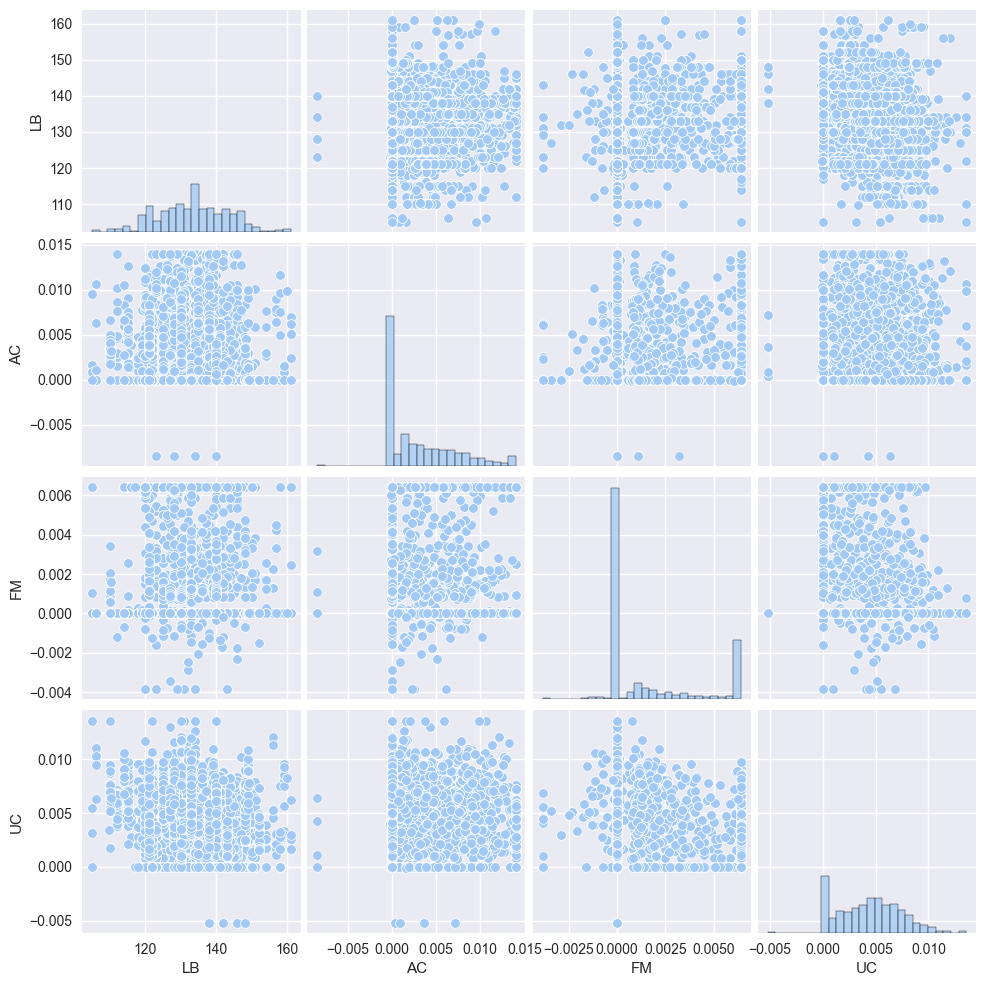

In [48]:
sns.pairplot(df.iloc[:, :4])
plt.show()

***violoin plot for distribution***

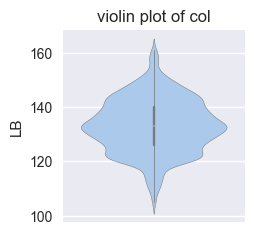

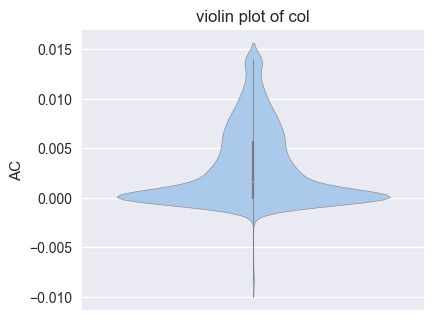

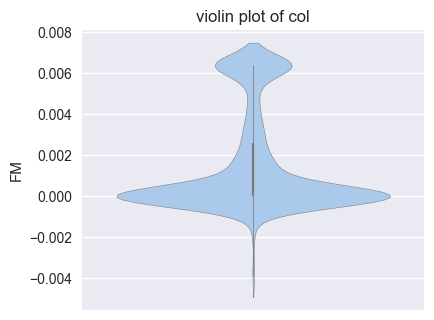

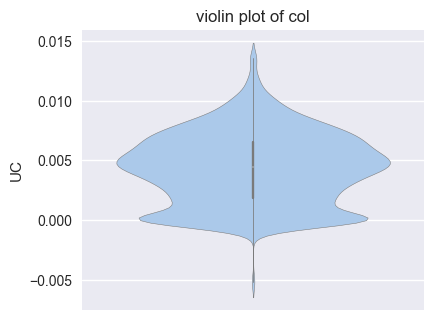

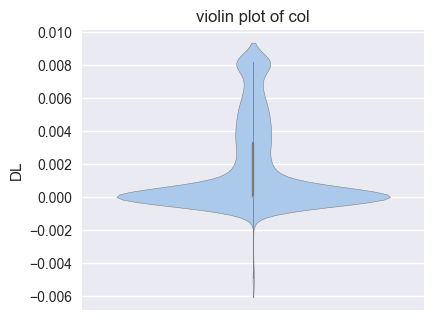

<Figure size 1500x800 with 0 Axes>

In [51]:
for i, col in enumerate(df.select_dtypes(include=np.number).columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[col])
    plt.title("violin plot of col")
    plt.tight_layout
    plt.figure(figsize=(15,8))

#Pattern recognisation and insight 

In [52]:
corr = df.corr()
print("Top correlations:\n", corr.unstack().sort_values(ascending=False).drop_duplicates().head(10))



Top correlations:
 LB        LB       1.000000
MSTV      Width    0.645744
DL        MSTV     0.566340
Width     DL       0.514538
ALTV      ASTV     0.439040
LB        ALTV     0.322431
MSTV      UC       0.297843
ASTV      LB       0.285623
AC        Width    0.283749
Tendency  LB       0.280796
dtype: float64


***CONCLUSION***

Dataset was cleaned by fixing missing values, data types, and outliers.

Statistical summary showed normal ranges but some skewness in features.

Visualizations – Histograms, boxplots, scatter plots, and heatmaps provided clear insights into distributions and relationships among features.

Features related to variability (ASTV, MSTV, ALTV, MLTV) strongly influenced fetal well-being and showed meaningful correlations with other parameters.

Patterns Identified – Strong relationships between fetal heart rate, uterine contractions, and variability features indicate their importance in detecting normal vs. abnormal cases.

****THe cleaned and analyzed dataset provides valuable insights for monitoring fetal health and establishes a strong base for predictive modeling and further medical research.****